## Text classification on LeMonde2003 Dataset

In this notebook, we 
apply classification algorithms to newspaper articles published in 2003 in *Le Monde*. 

The data are in data/LeMonde2003_9classes.csv.gz

These articles concern different subjects but we will consider only articles related to the following subjects : entreprises (ENT), international (INT), arts (ART), société (SOC), France (FRA), sports (SPO), livres (LIV), télévision (TEL) and the font page articles (UNE).


> * Load the CSV file `data/LeMonde2003_9classes.csv` containing the articles using pandas [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). How many articles do you have ? 
> * Plot the frequency histogram of the categories using seaborn [countplot](https://seaborn.pydata.org/tutorial/categorical.html) : `sns.countplot(data=df,y='category')`
> * Display the text of some of the article with the corresponding class using pandas [indexing](https://pandas.pydata.org/pandas-docs/version/0.17.0/indexing.html#indexing-integer)
> * Using the [WordCloud library](https://amueller.github.io/word_cloud/index.html), display a word cloud for the most frequent classes. You can remove the stop words using the `stopwords` option, using the list of stop words in French in `data/stop_word_fr.txt`.



In [83]:
import pandas as pd
import numpy as np

path='C:/Users/User/Downloads/text_classification/LeMonde2003_raw.csv'

data=pd.read_csv(path)
data.head()

text category
0  A la boutique du Fulham FC, nichée au dernier ...      SPO
1  IL Y A près d'un an, en pleine campagne présid...      TER
2  Pour la plupart de ceux qui n'y vivent pas, la...      ART
3  L'explosion s'est produite à 6 h 26. Maryan pr...      TER
4  LA PERSPECTIVE d'une enquête judiciaire sur la...      FRA

In [5]:
import seaborn as sns
%matplotlib inline

sns.countplot(data=data,y='category')# YOUR CODE HERE

In [8]:
# Print examples of the articles
# YOUR CODE HERE
data.sample(n=10)

text category
37019  OÙ QU'IL SE TROUVE, Mahyar Monshipour n'a de c...      SPO
30007  Le gouvernement afghan veut privilégier la nég...      INT
8846   C'EST UN DÉBAT récurrent autour du nucléaire, ...      ENT
16372  Y a-t-il une mode XVIIIe ? Après les sculpteur...      ART
27941  Les autorités de Téhéran jugeront elles-mêmes ...      INT
26983  EN COMBATTANT les mauvais néologismes, nous n'...      DER
4817   Alors que, dans les rues de Damas, grouillante...      INT
36854  Face à la panne de son enrouleur électrique ou...      AGE
31045  LES NOMINATIONS aux Césars, dont la 28e cérémo...      ART
32149  Brigitte Girardin, la ministre de l'outre-mer,...      FRA

In [19]:
data.category.isnull().sum()

3

In [21]:
df=data.dropna()

In [26]:
s_words=open('C:/Users/User/Downloads/text_classification/data/stop_word_fr.txt','r')
stopword=[]
for i in s_words:
    stopword.append(i.rstrip('\n'))
stopwords=set(stopword)
print(stopwords)

{'Ã©tÃ©', 'Ã©tiez', 'oust', 'sent', 'sois', 'restrictif', 'lÃ¨s', 'quatriÃ¨me', 'suffisant', 'hue', 'retour', 'mÃªmes', 'seul', 'couic', 'quand', 'dans', 'eu', 'serait', 'se', 'ni', 'suivant', 'ayons', 'oÃ¹', 'aujourd', 'leur', 'paf', 'hÃ©', 'chacun', 'comme', 'fi', 'enfin', 'trois', 'mince', 'lorsque', 'exceptÃ©', 'quanta', 'restent', 'cinquante', 'chÃ¨re', 'q', 'toujours', 'b', 'force', 'necessairement', 'par', 'personne', 'ma', 'procedant', 'ouias', 'strictement', 'pourquoi', 'sujet', 'tel', 'aient', 'ayant', 'laquelle', 'diverses', 'fÃ»t', 'mot', 'via', 'tels', 'nombreuses', 'peut', 'nÃ©anmoins', 'zut', 'sont', 'dits', 'ton', 'mien', 'toute', 'dedans', 'cette', 'pire', 'des', 'quelques', 'sienne', 'hormis', 'hum', 'derriÃ¨re', 'plouf', 'ces', 'troisiÃ¨mement', 'soyons', 'multiples', 'tiens', 'directement', 'lÃ\xa0', 'eh', 'suffit', 'deja', 'holÃ\xa0', 'absolument', 'afin', 'ho', 'vingt', 'vives', 'me', 'puisque', 'egales', 'quant-Ã\xa0-soi', 'possessif', 'necessaire', 'neuf', 'u', 

In [35]:
text = df[df['category']=='ENT']
text = " ".join(review for review in text.text)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 12338221 words in the combination of all review.


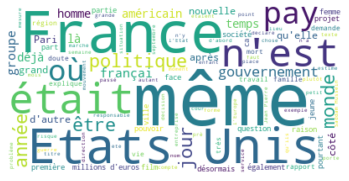

In [42]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt


# Display one wordcloud for each of the most frequent classes
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

INT


ENT


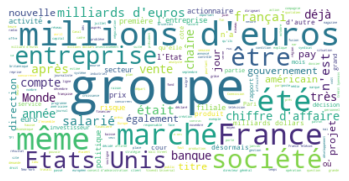

ART


In [44]:
from wordcloud import WordCloud
taille=['INT', 'ENT', 'ART']

for i in taille:
    print(i)
    text = df[df['category']==i]
    text = " ".join(review for review in text.text)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
    # Display the generated image:
    # the matplotlib way:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



## Bag-of-word representation

In order to apply machine learning algorithms to text, documents must be transformed into vectors. The most simple and standard way to transform a document into a vector is the *bag-of-word* encoding.

The idea is very simple : 

1. define the set of all the possible words that can appear in a document; denote its size by `max_features`.
2. for each document,  encode it with a vector of size `max_features`, with the value of the ith component of the vector equal to the number of time the ith word appears in the document.

See [the wikipedia article on Bag-of-word](https://en.wikipedia.org/wiki/Bag-of-words_model) for an example.

Scikit-learn proposes different methods to encode text into vectors : [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) and [TfidfTransformer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html).

The encoder must first be trained on the train set and applied to the different sets, for example with the 1000  words : 

	from sklearn.feature_extraction.text import CountVectorizer
	vectorizer = CountVectorizer(max_features=1000)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    X_test_counts = vectorizer.transform(X_test)
        
**Question**:

> * Split the dataset LeMonde2003 into train set (60%), dev set (20%)  and test set (20%) using scikit-learn [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
> * For each set, transform the text of the articles into vectors using the `CountVectorizer`, considering the 2000 most frequent words. 
> * train a naive bayes classifier on the data. Evaluate the classification accuracy on the train, dev and test sets.

> ***Important*** : the test set must not be used during the training phase, and learning the vector representation of the words is part of the training. The dev set should be an evaluation of the test set.



In [45]:
from sklearn.model_selection import train_test_split

X_train, X, y_train, y = train_test_split(df.text, df.category, test_size=0.4, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X, y, test_size=0.5, random_state=42)


In [46]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(X_train)
X_train_counts = vectorizer.transform(X_train)
X_valid_counts = vectorizer.transform(X_valid)
X_test_counts = vectorizer.transform(X_test)

In [50]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_counts,y_train)
y_pred=clf.predict(X_test_counts)
accu_train=clf.score(X_train_counts,y_train)
accu_test=clf.score(X_test_counts,y_test)
accu_valid=clf.score(X_valid_counts,y_valid)
print('accuracy of train data',accu_train)
print('accuracy of test data',accu_test)
print('accuracy of valid data',accu_valid)

accuracy of train data 0.614095529752031
accuracy of test data 0.5976776827867807
accuracy of valid data 0.5980604823274213


## TF-IDF representation

The `CountVectorizer` encodes the text using the raw frequencies of the words. However, words that are very frequent and appear in all the documents will have a strong weight whereas they are not discriminative. The *Term-Frequency Inverse-Document-Frequency* weighting scheme take into accound the number of documents in which a given word occurs. A word that appear in many document will have less weight. See [the wikipedia page](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) for more details.

With scikit-learn, the `TfidfTransformer` is applied after the `CountVectorizer` :

	from sklearn.feature_extraction.text import TfidfTransformer
	tf_transformer = TfidfTransformer().fit(X_train_counts)
 	X_train_tf = tf_transformer.transform(X_train_counts)
	X_test_tf = tf_transformer.transform(X_test_counts)
	
**Question**:

> * Use the TF-IDF representation to train a Multinomial Naive Bayes classifier. Report your best test error rate and the error rates for all the configurations tested.

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
X_test_tf = tf_transformer.transform(X_test_counts)
X_valid_tf = tf_transformer.transform(X_valid_counts)

In [57]:
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(X_train_tf,y_train)
y_pred=clf.predict(X_test_tf)
accu_train=clf.score(X_train_tf,y_train)
accu_test=clf.score(X_test_tf,y_test)
accu_valid=clf.score(X_valid_tf,y_valid)
print('accuracy of train data',accu_train)
print('accuracy of test data',accu_test)
print('accuracy of valid data',accu_valid)

accuracy of train data 0.5988260814087023
accuracy of test data 0.5911700905958913
accuracy of valid data 0.5962740844710986


## Error analysis

The classification error rate give an evaluation of the performance for all the classes. But since the classes are not equally distributed, they may not be equally well modelized. In order to get a better idea of the performance of the classifier, detailed metrics must be used : 

* [metrics.classification_report](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a detailed analysis per class : the precision (amongst all the example classified as class X, how many are really from the classX) and the recall (amongst all the example that are from the class X, how many are classified as class X) and the F-Score which is as a weighted harmonic mean of the precision and recall.
* [metrics.confusion_matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) which give the confusions between the classes. It can be displayed in color with [plot_confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix).

**Question**:

> * Report the `classification_report` for your  classifier. Which classes have the best scores ? Why ?
> * Report the `confusion_matrix` for your  classifier. Which classes are the most confused ? Why ?


              precision    recall  f1-score   support

         AGE       0.73      0.30      0.43       282
         ANA       0.82      0.04      0.07       230
         ART       0.48      0.85      0.61       874
         AUJ       0.00      0.00      0.00        17
         CAR       0.82      0.31      0.45       160
         DEB       0.80      0.04      0.07       111
         DER       0.94      0.13      0.23       262
         ENT       0.64      0.84      0.72      1237
         FRA       0.55      0.70      0.62       749
         HOR       0.33      0.08      0.12       339
         INT       0.60      0.88      0.71      1512
         SCI       0.60      0.02      0.04       144
         SOC       0.57      0.55      0.56       769
         SPA       0.00      0.00      0.00        20
         SPO       0.87      0.70      0.77       515
         TER       0.75      0.03      0.06       181
         UNE       0.33      0.00      0.00       435

    accuracy              

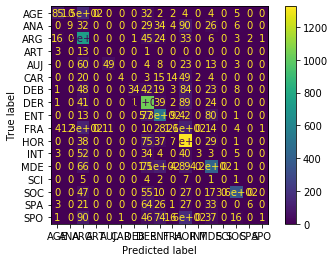

In [66]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#target_names=list(df.category.unique())
print(classification_report(y_test, y_pred))
confusion_matrix=confusion_matrix(y_test, y_pred)
plot_confusion_matrix(clf,X_test_tf,y_test)

## Hyperparameter optimization

The classification process has many parameters : alpha for the classifier, max_features, max_df, min_df, using idf or not, ngram orders for the Count of TfIDF transformer. These parameters can be optimized by a grid search using GridSearchCV.

**Question**:

> * Using the template code below, find the best values for the parameter alpha,  max_features, max_df, min_df, use_idf, ngram_range


In [80]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__alpha': (0.5,1.0,1.2,1.5),
    'vect__max_features': (1000,2000,3000,5000),
    'vect__min_df': (0.5, 0.75, 1.0),
    'tfidf__use_idf' : (True,False),
    'vect__ngram_range' : ((1,1),(2,2))
    }
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_valid, y_valid)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (0.5, 1.0, 1.2, 1.5),
 'tfidf__use_idf': (True, False),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__max_features': (1000, 2000, 3000, 5000),
 'vect__min_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (2, 2))}
Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  7.1min


KeyboardInterrupt: 

## Classification with Neural networks

Neural networks can be trained to learn both the vector representation of the words (instead of tf-idf) and how to classify the documents. The code below allows you to train a neural text classifier using word embeddings using Keras. Most of the code is written, you only have to define the architecture of the network with the correct parameters before training it : 

**Question**:

> * Define a neural network in the function `get_model()` with the following parameters : 
>  * use only the 10 000 most frequent words in the documents
>  * use 1024 as the maximal number of words in the articles
>  * use an embedding size of 300:  [embedding layer](https://keras.io/layers/embeddings/)
>  * use a dropout of 0.5:  [dropout layer](https://keras.io/layers/core/#dropout)
>  * use 32 convolutional filters of size 2 x EMBED_SIZE: [1D convolutional layer](https://keras.io/layers/convolutional/#conv1d)
>  * use a max pooling of size 2 : [1D Max Pooling](https://keras.io/layers/pooling/#maxpooling1d)
> * Train the model and compare its accuracy to the Naive Bayes models.



In [85]:
import ast
import os
from nn_utils import TrainingHistory
from keras.layers import Dense, Embedding, Input
from keras.layers import GRU, Dropout, MaxPooling1D, Conv1D, Flatten
from keras.models import Model
import numpy as np
import itertools
from keras.utils import np_utils
from sklearn.metrics import (classification_report, 
                             precision_recall_fscore_support, 
                             accuracy_score)

from keras.preprocessing import text, sequence



Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Model parameters
MAX_FEATURES = 10000
MAX_TEXT_LENGTH = 1024
EMBED_SIZE  = 300
BATCH_SIZE = 16
EPOCHS = 10
VALIDATION_SPLIT = 0.1

In [84]:
def get_train_test(train_raw_text, test_raw_text):
    
    tokenizer = text.Tokenizer(num_words=MAX_FEATURES)

    tokenizer.fit_on_texts(list(train_raw_text))
    train_tokenized = tokenizer.texts_to_sequences(train_raw_text)
    test_tokenized = tokenizer.texts_to_sequences(test_raw_text)
    return sequence.pad_sequences(train_tokenized, maxlen=MAX_TEXT_LENGTH), \
           sequence.pad_sequences(test_tokenized, maxlen=MAX_TEXT_LENGTH)



def get_model():

    inp = Input(shape=(1024,))
    model = Embedding(input_dim=MAX_FEATUREs, output_dim=EMBED_SIZE,input_length=MAX_TEXT_LENGTH)(inp)
    model = Dropout(0.5)(model)
    model = Conv1D(filters=32, kernel_size=(2,EMBED_SIZE), padding='same', activation='relu')(model)
    model = MaxPooling1D(pool_size=2)(model)
    model = Flatten()(model)
    model = Dense(7, activation="softmax")(model)
    model = Model(inputs=inp, outputs=model)
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model


def train_fit_predict(model, x_train, x_test, y, history):
    
    model.fit(x_train, y,
              batch_size=BATCH_SIZE,
              epochs=EPOCHS, verbose=1,
              validation_split=VALIDATION_SPLIT)

    return model.predict(x_test)


# Get the list of different classes
CLASSES_LIST = np.unique(y_train)
n_out = len(CLASSES_LIST)
print(CLASSES_LIST)

# Convert clas string to index
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(CLASSES_LIST)
y_train = le.transform(y_train) 
y_test = le.transform(y_test) 
train_y_cat = np_utils.to_categorical(y_train, n_out)

# get the textual data in the correct format for NN
x_vec_train, x_vec_test = get_train_test(X_train, X_test)
print(len(x_vec_train), len(x_vec_test))

# define the NN topology
model = get_model()

# Define training procedure
history = TrainingHistory(x_vec_test, y_test, CLASSES_LIST)

# Train and predict
y_predicted = train_fit_predict(model, x_vec_train, x_vec_test, train_y_cat, history).argmax(1)


print("Test Accuracy:", accuracy_score(y_test, y_predicted))

p, r, f1, s = precision_recall_fscore_support(y_test, y_predicted, 
                                              average='micro',
                                              labels=[x for x in np.unique(y_train) ])

print('p r f1 %.1f %.2f %.3f' % (np.average(p, weights=s)*100.0, 
                                 np.average(r, weights=s)*100.0, 
                                 np.average(f1, weights=s)*100.0))


print(classification_report(y_test, y_predicted, labels=[x for x in np.unique(y_train)]))

['AGE' 'ANA' 'ARG' 'ART' 'AUJ' 'CAR' 'DEB' 'DER' 'ENT' 'FRA' 'HOR' 'INT'
 'MDE' 'SCI' 'SOC' 'SPA' 'SPO' 'TER' 'UNE']


NameError: name 'np_utils' is not defined